## Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

**Задача 1**

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples = 1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 4, coef = True, random_state = 5)

In [5]:
data

array([[-1.80955123, -0.25551774],
       [-0.13230195, -0.37922499],
       [ 0.10385841,  0.30079666],
       ...,
       [-1.35815827,  0.79311658],
       [ 0.2023229 ,  0.67869955],
       [-0.24043683, -0.03720827]])

Отмасштабируем получившиеся признаки методом стандартизации (так как обучаем линейную модель - будем вычитать среднее значение и делить на среднеквадратичное отклонение).

In [6]:
data.shape

(1000, 2)

In [7]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [8]:
data

array([[-1.81414849, -0.27550451],
       [-0.13423335, -0.40058492],
       [ 0.10230238,  0.28698506],
       ...,
       [-1.36203808,  0.7847698 ],
       [ 0.20092337,  0.66908273],
       [-0.2425401 , -0.05477177]])

In [9]:
#получили среднее в нуле, а стандатрное отклонение в единице
means_d = np.mean(data, axis=0)
stds_d = np.std(data, axis=0)
means_d, stds_d

(array([ 1.16018306e-17, -2.08444373e-17]), array([1., 1.]))

In [13]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [28]:
#GD

#призанки
X = data.copy()

#таргет
Y = target

# возьмем нулевые начальные веса
w = np.zeros(data.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 16.9966


In [29]:
len(errors)

969

In [30]:
#SGD

#призанки
X = data.copy()

#таргет
Y = target

# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_sgd = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e4
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_sgd.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 16.9966


In [31]:
len(errors_sgd)

10000

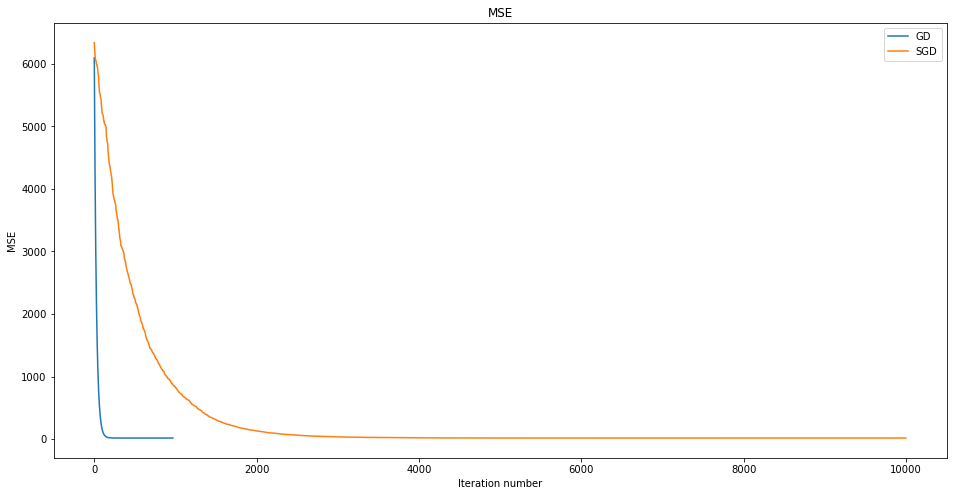

In [39]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize= (16, 8))
plt.plot(range(len(errors)), errors, label = 'GD')
plt.plot(range(len(errors_sgd)), errors_sgd, label = 'SGD')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='upper right')

**Вывод**

Исходя из графика и данных ошибок видно, что SGD обучается за гораздо большее количество итераций (в нашем примере получилось 10000 у SGD и 969 у GD - разница в 10 раз). И все же у SGD есть свои плюсы, которые заключаются в том, что SGD не обучается на одном случайно взятом объекте и не требует необходимости держать в опетивной памяти весь массив данных. Также SGD (как говорили на лекции) дает возможность выходить из локальных минимумов при обучениее нейронных сетей. 